In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
features = pd.read_csv('train_features.csv', delimiter = ",")
salaries = pd.read_csv('train_salaries.csv', delimiter = ",")

In [3]:
features = features.set_index('jobId')
salaries = salaries.set_index('jobId')
combined = features.merge(salaries, on="jobId")

## Preparation

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, JOB1362684407687 to JOB1362685407686
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   companyId            1000000 non-null  object
 1   jobType              1000000 non-null  object
 2   degree               1000000 non-null  object
 3   major                1000000 non-null  object
 4   industry             1000000 non-null  object
 5   yearsExperience      1000000 non-null  int64 
 6   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 61.0+ MB


In [5]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, JOB1362684407687 to JOB1362685407686
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   salary  1000000 non-null  int64
dtypes: int64(1)
memory usage: 15.3+ MB


In [6]:
combined.isnull().sum()

companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [7]:
combined.duplicated().sum()

186

In [8]:
combined=combined.drop_duplicates()
combined

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...
JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64


In [9]:
#Referenced
inv_salary = combined['salary']<=0
invalid_salary = combined[inv_salary]
invalid_salary

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [10]:
#Referenced
combined = combined.drop(invalid_salary.index.tolist())

In [11]:
combined.dtypes

companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

In [12]:
#Referenced
combined['companyId']=pd.Categorical(combined['companyId'])
combined['jobType']=pd.Categorical(combined['jobType'])
combined['degree']=pd.Categorical(combined['degree'])
combined['major']=pd.Categorical(combined['major'])
combined['industry']=pd.Categorical(combined['industry'])
combined.dtypes

companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

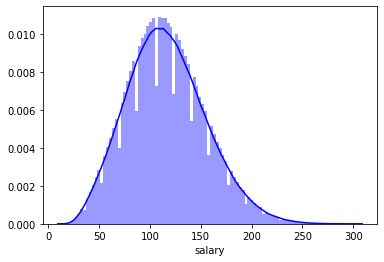

In [13]:
sns.distplot(combined.salary, bins=100,color = 'b')
plt.show()

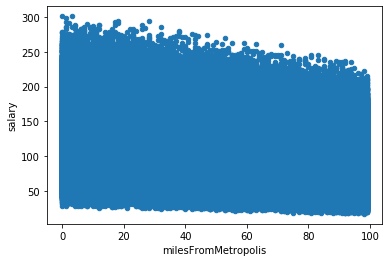

In [14]:
combined.plot(kind='scatter', x='milesFromMetropolis', y='salary')
plt.show()

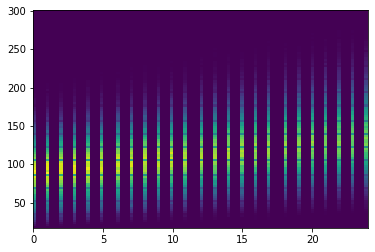

In [15]:
x = combined.yearsExperience
y = combined.salary
plt.hist2d(x,y,bins=100)
plt.show()

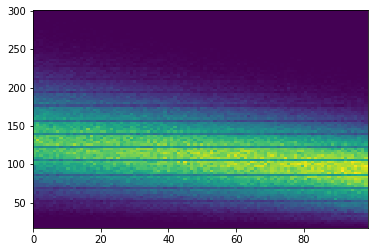

In [16]:
x = combined.milesFromMetropolis
y = combined.salary
plt.hist2d(x,y,bins=100)
plt.show()

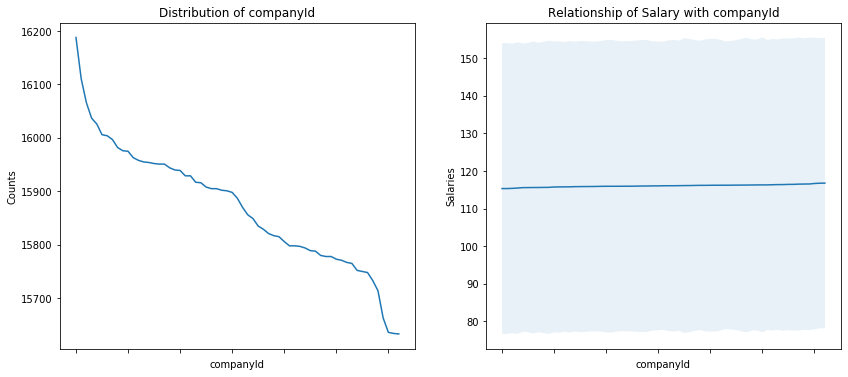

In [17]:
#Referenced
def plot_feature(df, col):
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title('Distribution of {}'.format(col))
    plt.subplot(1, 2, 2)
    
    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df.sort_values('salary'))
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.title('Relationship of Salary with {}'.format(col))
    plt.show()
plot_feature(combined,'companyId')

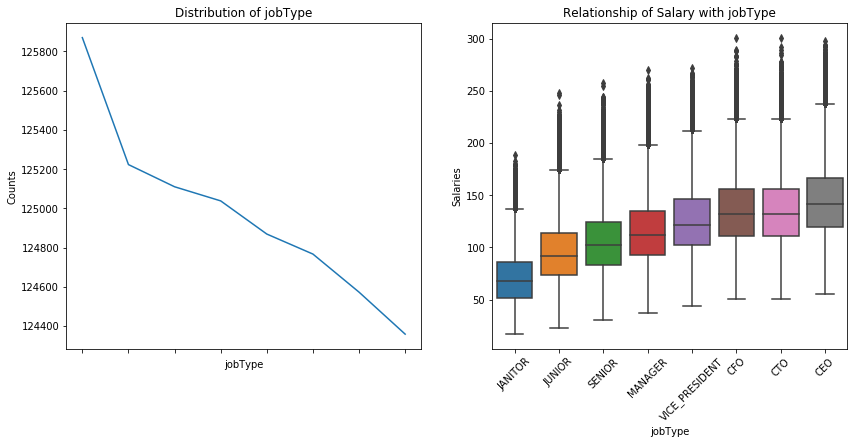

In [18]:
#Referenced
plot_feature(combined,'jobType')

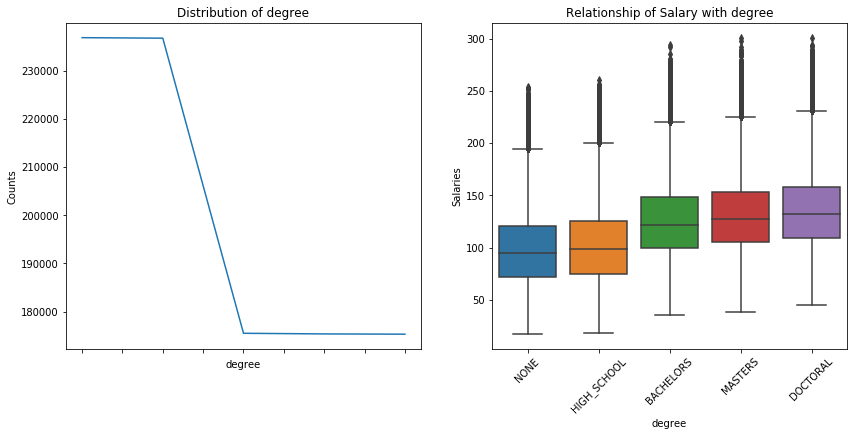

In [19]:
#Referenced
plot_feature(combined,'degree')

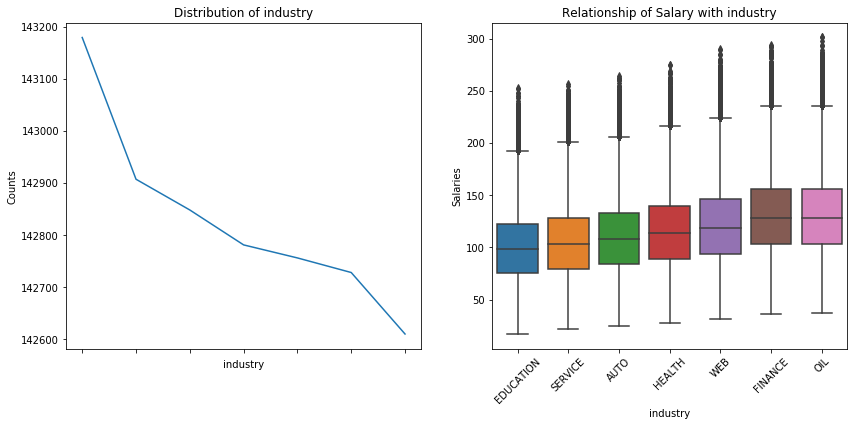

In [20]:
#Referenced
plot_feature(combined,'industry')

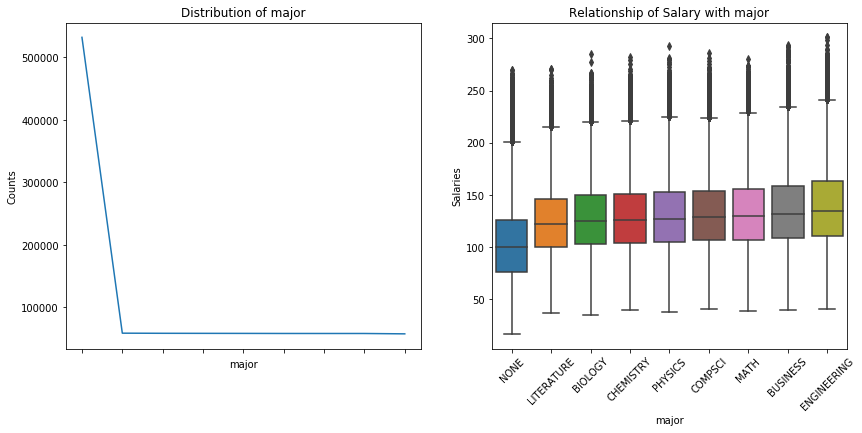

In [21]:
#Referenced
plot_feature(combined,'major')

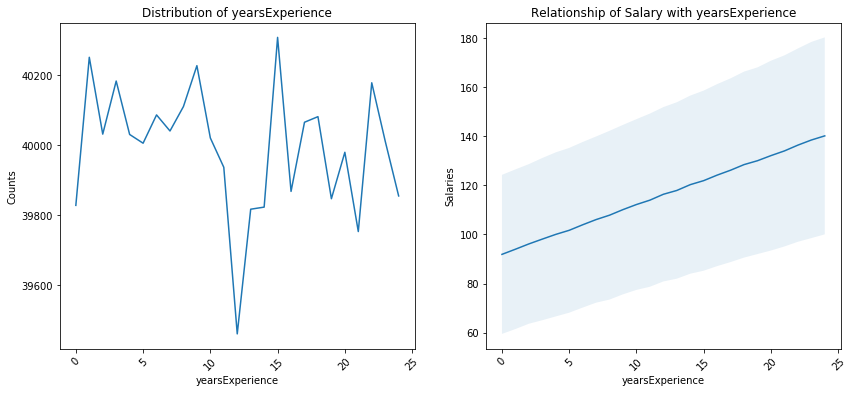

In [22]:
#Referenced
plot_feature(combined,'yearsExperience')

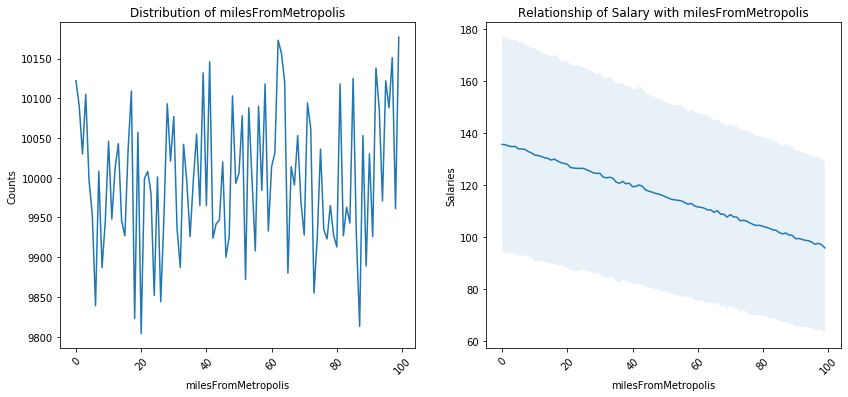

In [23]:
#Referenced
plot_feature(combined,'milesFromMetropolis')

## Training

In [24]:
combined = pd.get_dummies(combined)
combined1 = combined.copy(deep=True)
combined.head()

,yearsExperience,milesFromMetropolis,salary,companyId_COMP37,companyId_COMP53,companyId_COMP57,companyId_COMP42,companyId_COMP54,companyId_COMP18,companyId_COMP55,...,major_MATH,major_BUSINESS,major_ENGINEERING,industry_EDUCATION,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL
jobId,,,,,,,,,,,,,,,,,,,,,
JOB1362684407687,10,83,130,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
JOB1362684407688,3,73,101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
JOB1362684407689,10,38,137,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
JOB1362684407690,8,17,142,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
JOB1362684407691,8,16,163,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split
x = combined1.drop('salary', axis=1)
y = combined[['salary']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
from sklearn.linear_model import LinearRegression as lm
model = lm().fit(x_train, y_train)
predictions = model.predict(y_test)
plt.scatter(x_test, predictions)
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 94 is different from 1)

### Fallback Training

In [27]:
features = pd.get_dummies(features)
features.head()

,yearsExperience,milesFromMetropolis,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
jobId,,,,,,,,,,,,,,,,,,,,,
JOB1362684407687,10,83,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
JOB1362684407688,3,73,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
JOB1362684407689,10,38,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
JOB1362684407690,8,17,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
JOB1362684407691,8,16,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
features_train, features_test, salaries_train, salaries_test = train_test_split(features,salaries,test_size=0.2)
features_train.head()

,yearsExperience,milesFromMetropolis,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
jobId,,,,,,,,,,,,,,,,,,,,,
JOB1362684643037,20,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
JOB1362685257867,24,65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
JOB1362684710077,16,17,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
JOB1362685324802,22,88,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
JOB1362684904924,3,76,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


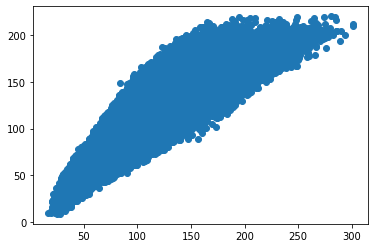

In [29]:
from sklearn.linear_model import LinearRegression as lm
model = lm().fit(features_train, salaries_train)
predictions = model.predict(features_test)
plt.scatter(salaries_test, predictions)
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(salaries_test, predictions)

384.6034723924858

In [31]:
from sklearn.metrics import r2_score
r2_score(salaries_test, predictions)

0.7431238441741506